<a href="https://colab.research.google.com/github/jggoncalez/BubbleSort/blob/main/notebooks/modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem — Doenças Cardiovasculares

Este notebook realiza o **pré-processamento**, o **treinamento**
e a **avaliação** dos modelos de Machine Learning aplicados ao
dataset de doenças cardiovasculares.

O objetivo é treinar e comparar diferentes algoritmos para
prever o diagnóstico de doença cardíaca em pacientes, com base
em variáveis clínicas como idade, pressão arterial, colesterol
e frequência cardíaca máxima.

### O que você vai encontrar aqui:
- Pré-processamento e normalização dos dados
- Treinamento de 6 modelos de classificação
- Avaliação com métricas de desempenho
- Comparação final entre os modelos
- Conclusão sobre o melhor algoritmo para o problema

### Setup Inicial


In [1]:
url = "https://raw.githubusercontent.com/jggoncalez/cardiovascular-diseases-AI/main/data/Cardiovascular_Disease_Dataset.csv"

In [2]:
!git clone https://github.com/jggoncalez/cardiovascular-diseases-AI.git
%cd cardiovascular-diseases-AI
!pip install -r requirements.txt

fatal: destination path 'cardiovascular-diseases-AI' already exists and is not an empty directory.
/content/cardiovascular-diseases-AI


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay,
    classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv(url)

### Pré-processamento

#### Verificações

In [4]:
# Verifica se há valores nulos (iguais a 0)
print(data.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [5]:
# Verifica o tipo de dado de cada coluna
print(data.dtypes)

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object


#### Preparação dos dados

In [6]:
# Separa X e y
X = data.drop('target', axis=1)
y = data['target']

# Normaliza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide treino e teste (train-test split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Saída para teste
print(f'Treino: {X_train.shape[0]} pacientes')
print(f'Teste:  {X_test.shape[0]} pacientes')

Treino: 800 pacientes
Teste:  200 pacientes


### Treinamento

In [7]:
modelos = {
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier':      SGDClassifier(),
    'SVM':                 SVC(probability=True),
    'Decision Tree':       DecisionTreeClassifier(),
    'AdaBoost':            AdaBoostClassifier(),
    'XGBoost':             xgb.XGBClassifier()
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    print(f'{nome} treinado')

Logistic Regression treinado
SGD Classifier treinado
SVM treinado
Decision Tree treinado
AdaBoost treinado
XGBoost treinado


### Avaliação com Métricas

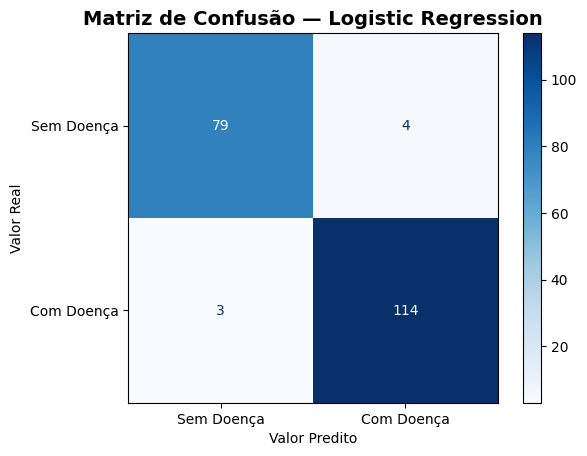

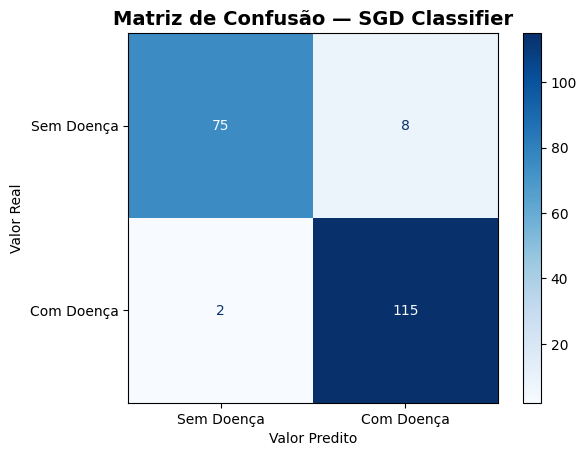

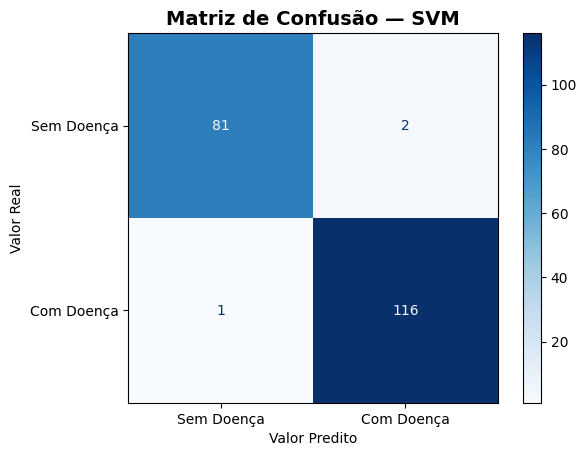

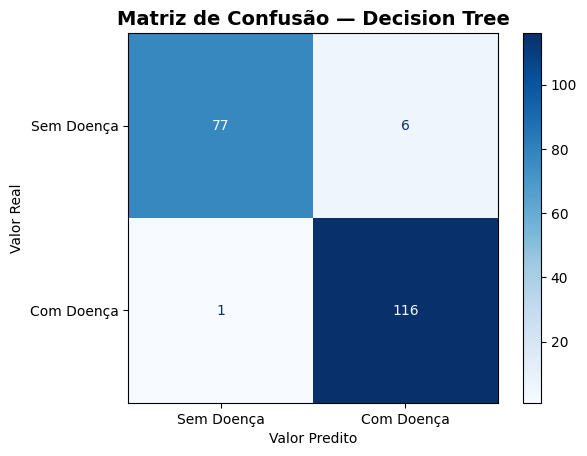

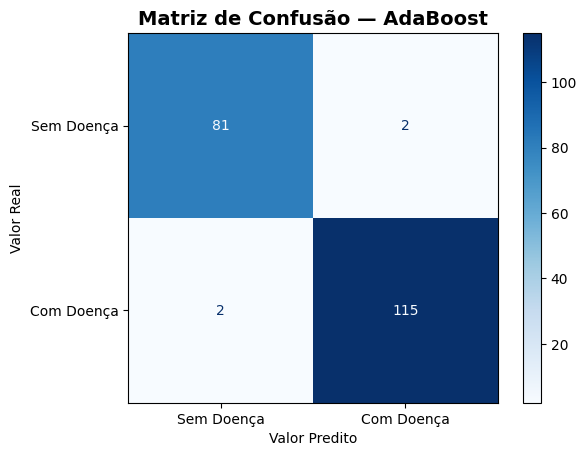

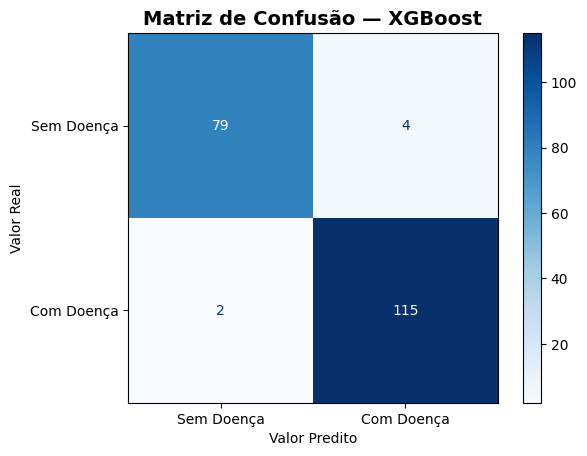

In [8]:
resultados = []

for nome, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    resultados.append({
        'Modelo':    nome,
        'Acurácia':  accuracy_score(y_test, y_pred),
        'Precisão':  precision_score(y_test, y_pred),
        'Recall':    recall_score(y_test, y_pred),
        'F1-Score':  f1_score(y_test, y_pred),
        'ROC-AUC':   roc_auc_score(y_test, y_pred)
    })

    ConfusionMatrixDisplay.from_estimator(
    modelo, X_test, y_test,
    display_labels=['Sem Doença', 'Com Doença'],
    cmap='Blues')
    plt.title(f'Matriz de Confusão — {nome}', fontsize=14, fontweight='bold')
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')
    plt.show()


In [9]:
# Tabela comparativa
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('F1-Score', ascending=False)
print(df_resultados.to_string(index=False))

             Modelo  Acurácia  Precisão   Recall  F1-Score  ROC-AUC
                SVM     0.985  0.983051 0.991453  0.987234 0.983678
           AdaBoost     0.980  0.982906 0.982906  0.982906 0.979405
            XGBoost     0.970  0.966387 0.982906  0.974576 0.967357
      Decision Tree     0.965  0.950820 0.991453  0.970711 0.959582
Logistic Regression     0.965  0.966102 0.974359  0.970213 0.963083
     SGD Classifier     0.950  0.934959 0.982906  0.958333 0.943260


### Conclusão

O modelo **SVM** obteve o melhor desempenho geral, com F1-Score
de 0.987 e Recall de 0.991 — identificando corretamente 99.1%
dos pacientes com doença cardiovascular.

Em problemas de diagnóstico médico, o Recall é a métrica mais
crítica, pois um falso negativo — paciente doente classificado
como saudável — representa risco real à vida do paciente.